In [1]:
#EP Problem Set 1, Problem 2

In [2]:
#STEPS: 
#step 1: create chebyshev fit. order will dictate number of points
#step 2: fit a REALLY high order, print out coefficients and residuals until error < 10**(-6)

#step 5: run np.polynomial.legendre.legfit

#step 6: plot residuals, answer questions

In [3]:
import numpy as np
import matplotlib.pyplot as mpl

In [4]:
def cheby_fit(fun, order, xrange):
    x = np.linspace(xrange[0], xrange[1], order+1)
    y = fun(x)

    T = np.zeros((order+1, order+1))
    T[:, 0] = 1
    T[:, 1] = x
    for ii in range(2, order+1): #generate the chebyshev polynomials
        T[:, ii]=2*x*T[:, ii-1] - T[:, ii-2]

    #general colution T(x)c = y. solve for coeffs c = Tinv y
    coeffs = np.linalg.inv(T)@y #be sure to use matrix multiplication
    
    return coeffs

def cheby_eval(coeffs, x_test):

    Tcheby = np.zeros((len(x_test), order+1))
    Tcheby[:, 0] = 1
    Tcheby[:, 1] = x_test
    for ii in range(2, order+1): #generate the chebyshev polynomials
        Tcheby[:, ii]=2*x_test*Tcheby[:, ii-1] - Tcheby[:, ii-2]
    return Tcheby@coeffs #Tc = y
    

cheby coefficients:  [-3.93202471e+01  6.69006511e+01 -4.25041511e+01  2.09499232e+01
 -7.75311944e+00  2.04332110e+00 -3.44524275e-01  2.81464188e-02]

 cheby rms error:  3.4799141900025214e-07
cheby max error:  2.265940683976453e-07

 poly rms error:  3.4802163151245933e-07
poly max error:  2.264015162012356e-07


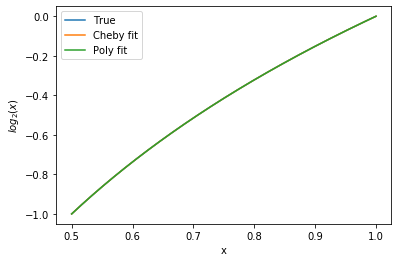

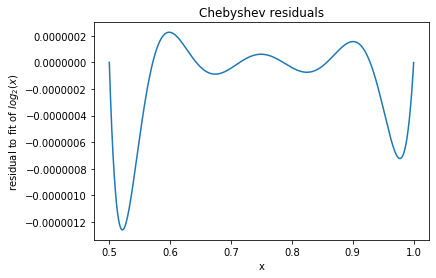

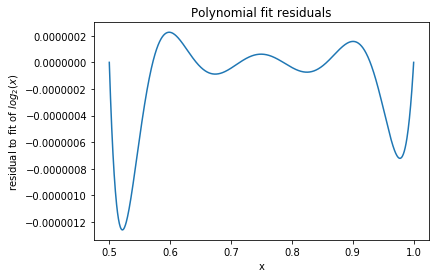

In [7]:
#call chebyshev fit
fun = np.log2
order=7 #at order=6 error is on the order of 10**(-6). use order=7 for 10**(-7) error.
xrange=[0.5,1]
coeffs=cheby_fit(fun, order, xrange)

#evaluate chebyshev fit with test points
test_pts = 1000
x_test = np.linspace(xrange[0], xrange[1], test_pts)
y_test = cheby_eval(coeffs, x_test)
y_true = np.log2(x_test)
print('cheby coefficients: ', coeffs)

print('\n cheby rms error: ', np.std(y_test-y_true))
print('cheby max error: ', max(y_test-y_true))

#use alternate polynomial fit to fit function
x = np.linspace(xrange[0], xrange[1], order+1) #in fairness, same points as used by cheby
# polyfit = np.polynomial.legendre.legfit(x, np.log2(x), order) #this does terribly
polyfit = np.polyfit(x, np.log2(x), order) #use same order
y_poly = np.polyval(polyfit, x_test)

print('\n poly rms error: ', np.std(y_poly-y_true))
print('poly max error: ', max(y_poly-y_true))

mpl.figure()
mpl.plot(x_test, y_true)
mpl.plot(x_test, y_test)
mpl.plot(x_test, y_poly)
mpl.xlabel('x')
mpl.ylabel('$log_2(x)$')
mpl.legend(['True', 'Cheby fit', 'Poly fit'])
mpl.show()

mpl.figure()
mpl.plot(x_test, y_test-y_true)
mpl.xlabel('x')
mpl.ylabel('residual to fit of $log_2(x)$')
mpl.title('Chebyshev residuals')
mpl.show()

mpl.figure()
mpl.plot(x_test, y_poly-y_true)
mpl.xlabel('x')
mpl.ylabel('residual to fit of $log_2(x)$')
mpl.title('Polynomial fit residuals')
mpl.show()

The Chebyshev fit has slightly better RMS error, and a slightly worse maximum error, than the polynomial fit using numpy polyfit. Both 
Seven terms are needed for the chebyshev fit to 